In [95]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader,TensorDataset

from torchvision import transforms,datasets


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [97]:
transform=transforms.ToTensor()

In [98]:
train_data=datasets.MNIST(root="MNIST",train=True,download=True,transform=transform)
test_data=datasets.MNIST(root="MNIST",train=False,download=True,transform=transform)

In [99]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

In [100]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST
    Split: Test
    StandardTransform
Transform: ToTensor()

In [101]:
train_loader=DataLoader(train_data,batch_size=100,shuffle=True)
test_loader=DataLoader(test_data,batch_size=500,shuffle=True)

In [102]:
for i,(images,labels) in enumerate(train_data):
    break
print(images.shape)
print(images.shape)


torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


In [103]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1=nn.Conv2d(1,6,3,1) # 1,6,26,26
        # MaxPooling 1,6,13,13
        self.conv2=nn.Conv2d(6,16,3,1) # 6,16,11,11
        # MaxPooling 6,16,5,5
        self.fc1=nn.Linear(5*5*16,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=F.max_pool2d(x,2,2)
        x=F.relu(self.conv2(x))
        x=F.max_pool2d(x,2,2)
        x=x.view(-1,16*5*5) # Bu işlem olmazsa shape hatası veriyor. 
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.log_softmax(x,dim=1)
    

In [104]:
model=CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [105]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [106]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.002)

In [107]:
epochs=5
train_loss=[]
test_loss=[]
train_correct=[]
test_torrect=[]
for epoch in range(epochs):
    epoch+=1
    trn_corr=0
    tst_corr=0
    for i, (x_train,y_train) in enumerate(train_loader):
        out=model(x_train)
        loss=criterion(out,y_train)
        predict_tr=torch.max(out.data,1)[1]
        trn_corr+=(predict_tr==y_train).sum()
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%600==0:
            print("Epochs {} Loss {}".format(epoch,loss.item()))
    train_correct.append(trn_corr)
    train_loss.append(loss.item())
    
    with torch.no_grad():
        for b,(x_test,y_test) in enumerate(test_loader):

            
            predict=model(x_test)
            predict_tst=torch.max(predict.data,1)[1]
            tst_corr+=(predict_tst==y_test).sum()
        loss=criterion(predict,y_test)
        test_loss.append(loss.item())
        test_torrect.append(tst_corr)
            
            


Epochs 1 Loss 2.3205173015594482
Epochs 2 Loss 0.05179202929139137
Epochs 3 Loss 0.026192188262939453
Epochs 4 Loss 0.009932715445756912
Epochs 5 Loss 0.00849173590540886


ValueError: Unrecognized character T in format string

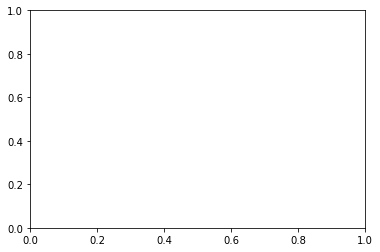

In [108]:
plt.plot(train_loss,"Train Acc")
plt.plot(test_loss,"Test Acc")
plt.legend()

ValueError: Unrecognized character T in format string

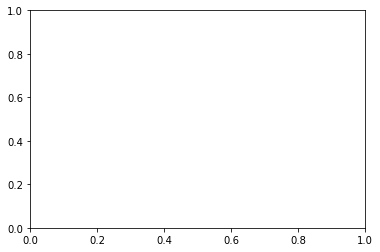

In [109]:
plt.plot(train_correct,"Train Acc")
plt.plot(test_torrect,"Test Acc")
plt.legend()

In [110]:
test_all_loader=DataLoader(test_data,batch_size=10000,shuffle=True)
with torch.no_grad():
    correct=0
    for b,(x_test,y_test) in enumerate(test_all_loader):
        out=model(x_test)
        predict=torch.max(out.data,1)[1]
        correct+=(predict==y_test).sum()
correct.item()/len(test_data)

0.9867

In [111]:
print(confusion_matrix(predict.view(-1),y_test.view(-1)))

[[ 979    0    1    0    0    1    7    0    4    1]
 [   0 1133    1    0    0    0    2    4    0    1]
 [   0    1 1024    0    2    1    1    8    4    0]
 [   0    0    4 1008    0   16    1    2   10    5]
 [   0    0    0    0  969    0    3    1    2    6]
 [   0    0    0    1    0  871    1    0    2    3]
 [   0    1    0    0    3    2  943    0    1    0]
 [   1    0    2    0    0    1    0 1009    1    3]
 [   0    0    0    0    0    0    0    1  943    2]
 [   0    0    0    1    8    0    0    3    7  988]]


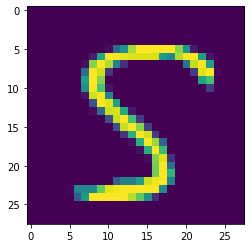

In [119]:
plt.imshow(test_data[333][0].reshape(28,28))

In [120]:
model.eval()
with torch.no_grad():
    new_pred=model(test_data[333][0].view(1,1,28,28))

In [121]:
new_pred.argmax()

tensor(5)

In [123]:
test_data[333][1]

5